In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

In [2]:
data_df = pd.read_csv("driver-data.csv")
data_df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.8 KB


In [4]:
# Removing ID as its useless and increase complexity
clean_data_df = data_df.drop(columns=['id'])

In [5]:
clean_data_df.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [6]:
import scipy.cluster.hierarchy as sch

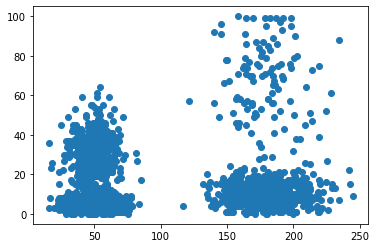

In [7]:
plt.scatter(clean_data_df['mean_dist_day'], clean_data_df['mean_over_speed_perc'], )
plt.show()

In [8]:
km = KMeans(n_clusters=2)
km.fit(clean_data_df)
km.labels_

array([1, 1, 1, ..., 0, 0, 0])

### Fetching count of elements in each cluster

In [9]:
unik, counts = np.unique(km.labels_, return_counts=True)

In [10]:
dict(zip(unik, counts))

{0: 800, 1: 3200}

In [11]:
data_df['cluster'] = km.labels_

f:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


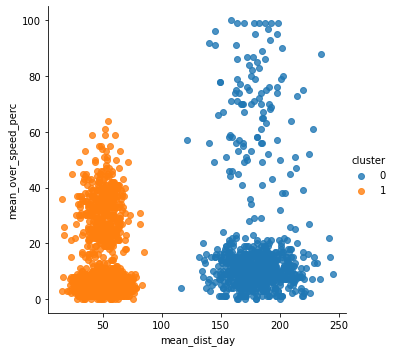

In [12]:
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=data_df, hue="cluster", fit_reg=False, aspect=1)
plt.show()

##  Lets try with 4 k clusters

In [13]:
clean_data_df.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [14]:
km4 = KMeans(n_clusters=4)
km4.fit(clean_data_df)
labels_predicted_4 = km4.labels_

In [15]:
data_df['cluster'] = labels_predicted_4

In [16]:
unik, counts = np.unique(labels_predicted_4, return_counts=True)
dict(zip(unik, counts))

{0: 696, 1: 2773, 2: 427, 3: 104}

f:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


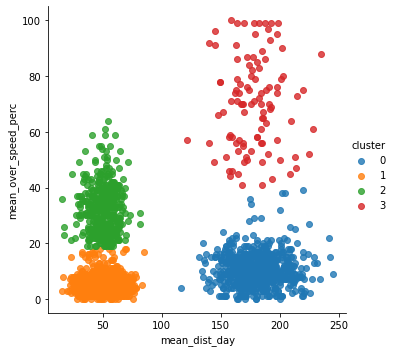

In [17]:
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=data_df, hue="cluster", fit_reg=False, aspect=1)
plt.show()

#### This is better clustering as compared to 2 cluster.